# <center>PREDICTING ALCOHOLIC CONTENT IN WINES

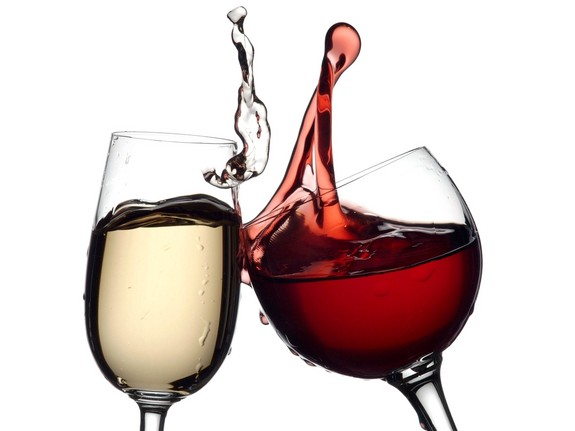

# Wine is an alcoholic beverage made with the fermented juice of grapes.

### Technically, any fruit is capable of being used for wine (i.e., apples, cranberries, plums, etc.), but if it just says “wine” on the label, then it’s made with grapes. (By the way, wine grapes are different than table grapes). Wine contains ethyl alcohol, the chemical in beer and distilled spirits. The effects of wine depend on the amount consumed, the span of time over which consumption occurs, and the amount of alcohol in the wine, among other factors. Drinking enough to reach a blood alcohol concentration (BAC) of 0.03%-0.12% may cause an overall improvement in mood, increase self-confidence and sociability, decrease anxiety, flushing of the face, and impair judgment and fine motor coordination


## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR 
from sklearn.model_selection import cross_val_score

In [2]:
d=pd.read_csv('Wine_Quality_Data.csv')
d

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## EDA

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
d.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
d.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [7]:
d.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
d.duplicated().sum()

1177

In [9]:
d.drop_duplicates(inplace=True)

In [10]:
d.shape

(5320, 13)

In [11]:
d.sample()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
4100,6.4,0.31,0.4,6.4,0.039,39.0,191.0,0.99513,3.14,0.52,9.8,5,white


In [12]:
d.isnull().mean()*100

fixed_acidity           0.0
volatile_acidity        0.0
citric_acid             0.0
residual_sugar          0.0
chlorides               0.0
free_sulfur_dioxide     0.0
total_sulfur_dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
color                   0.0
dtype: float64

## Univariate analysis;

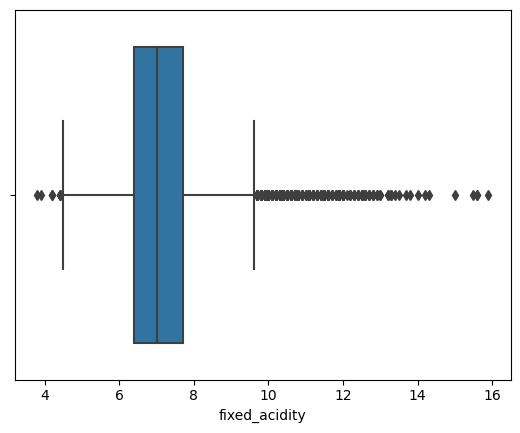

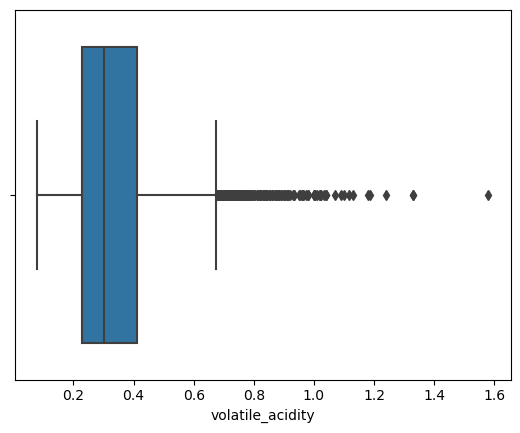

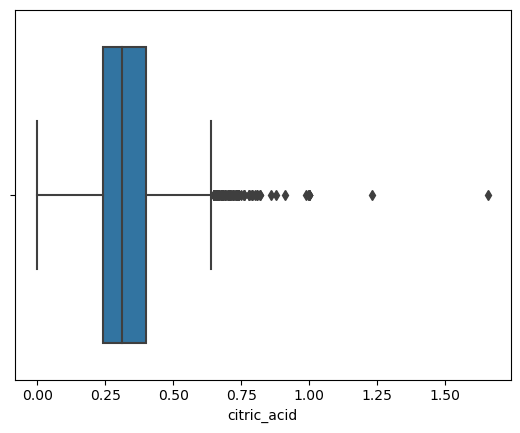

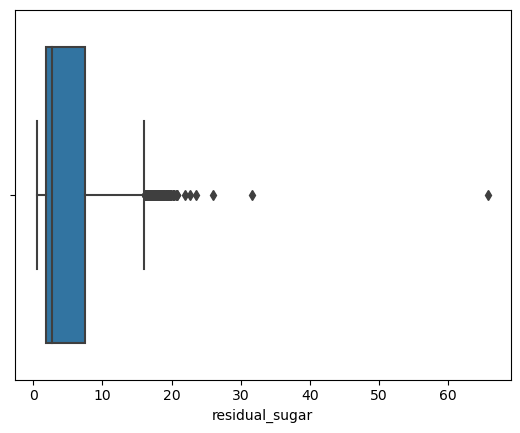

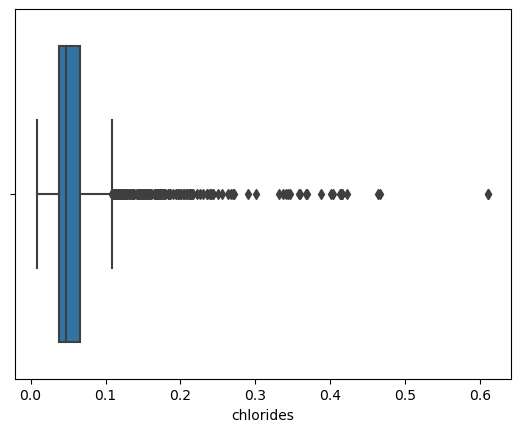

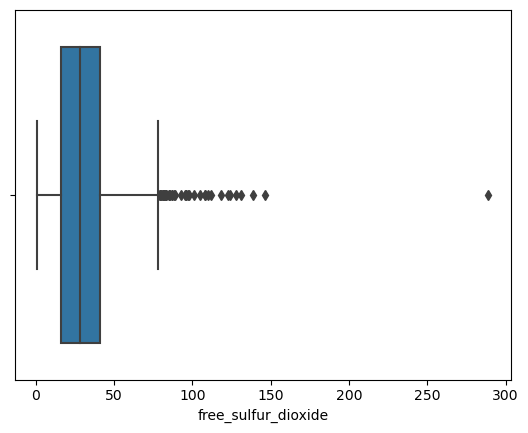

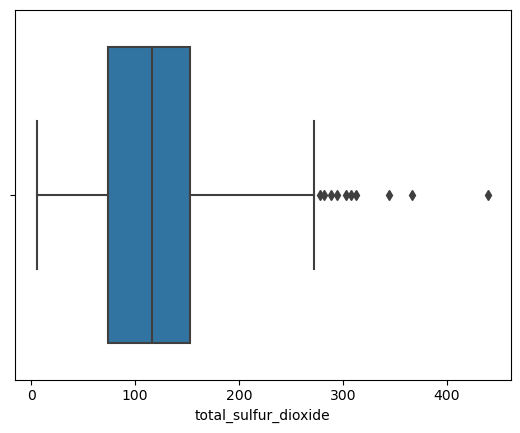

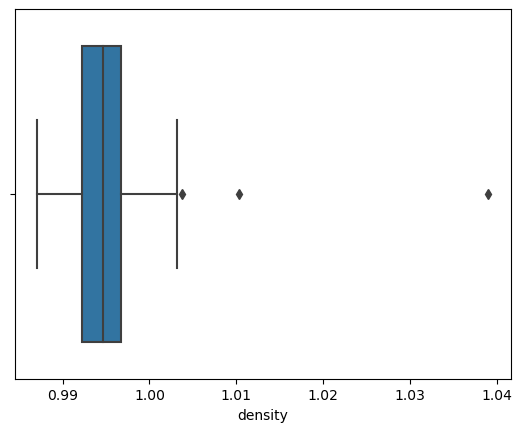

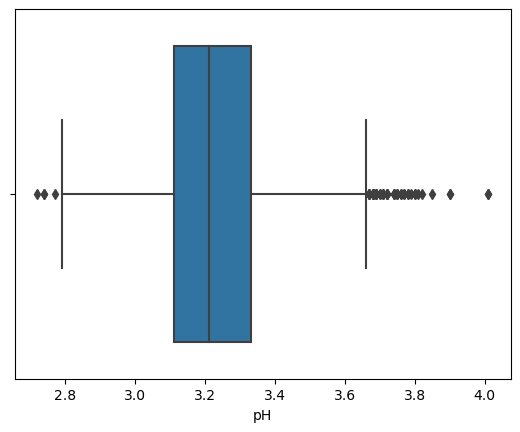

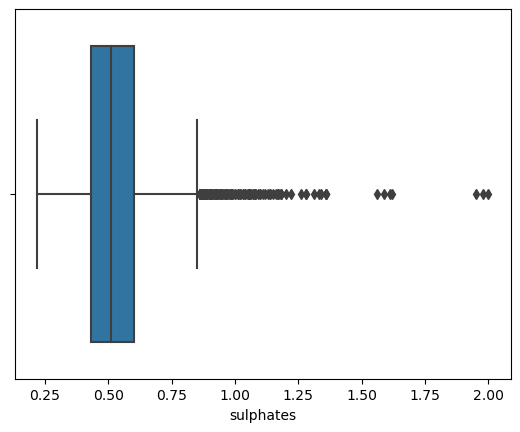

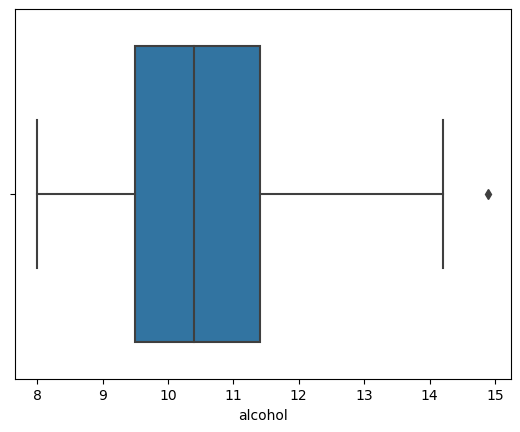

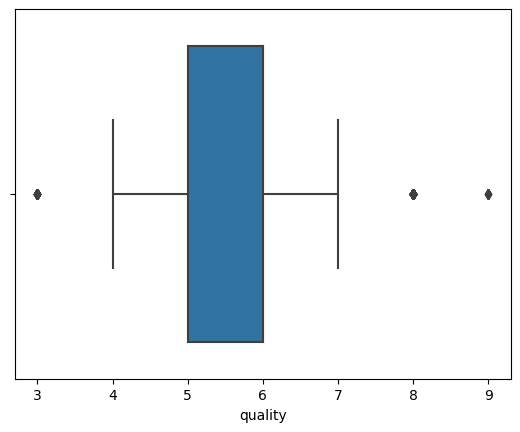

In [13]:
for i in d.columns:
    if d[i].dtypes!='object':
        sns.boxplot(x=d[i])
        plt.show()

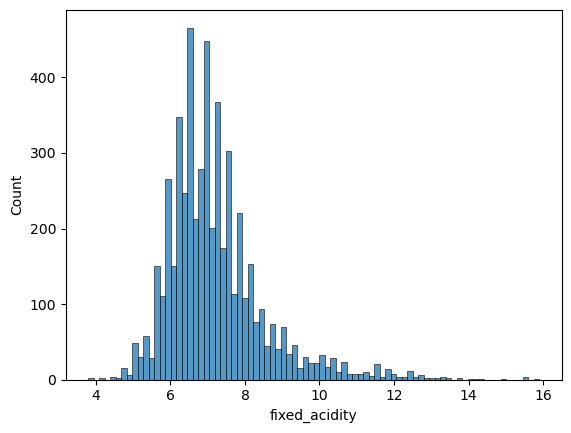

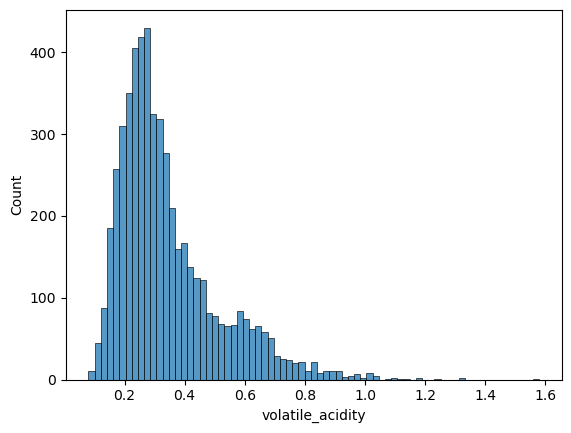

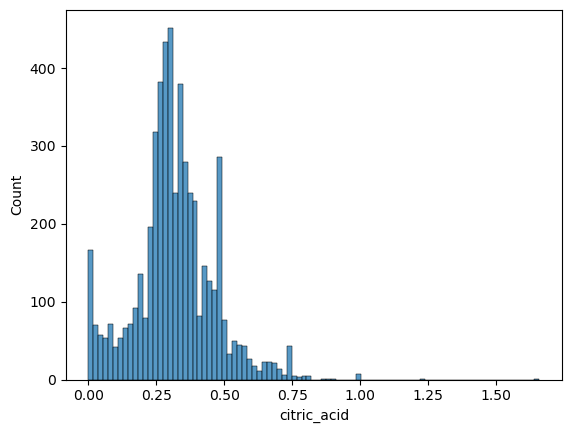

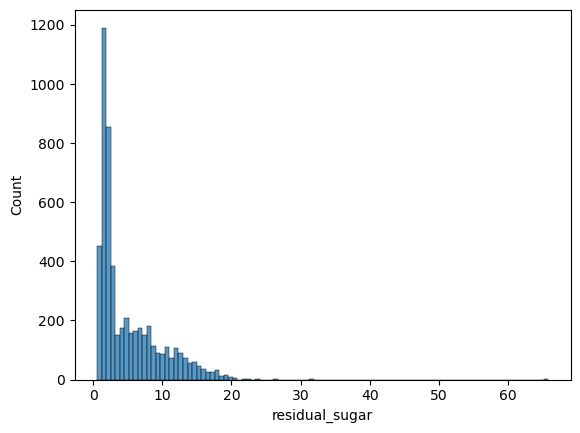

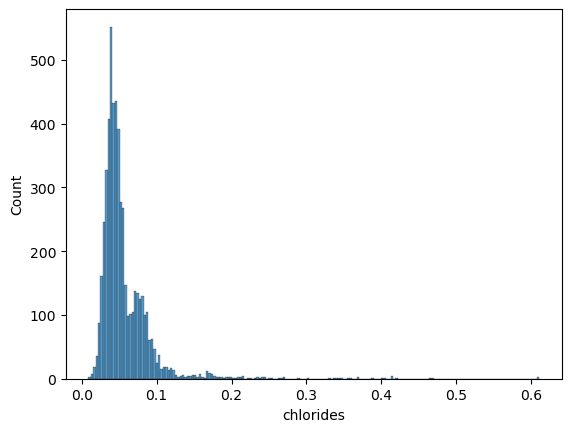

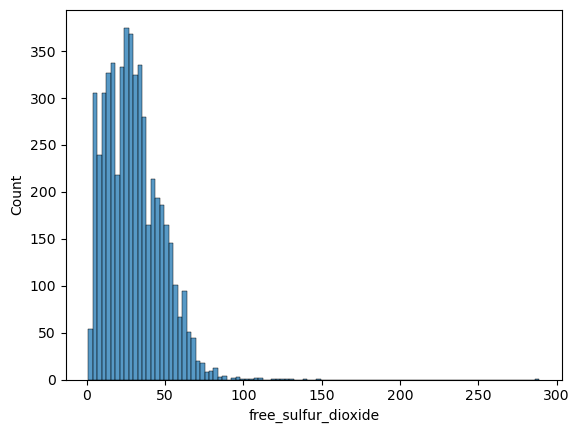

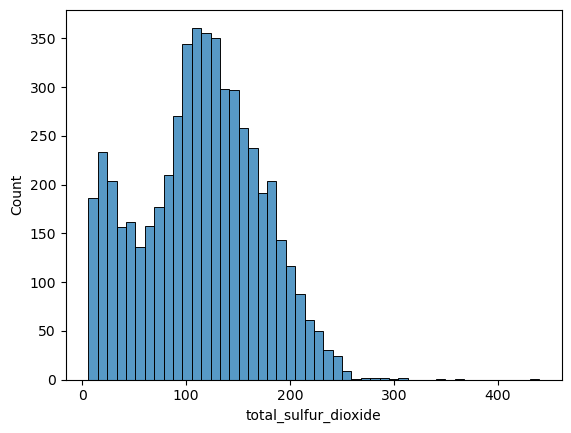

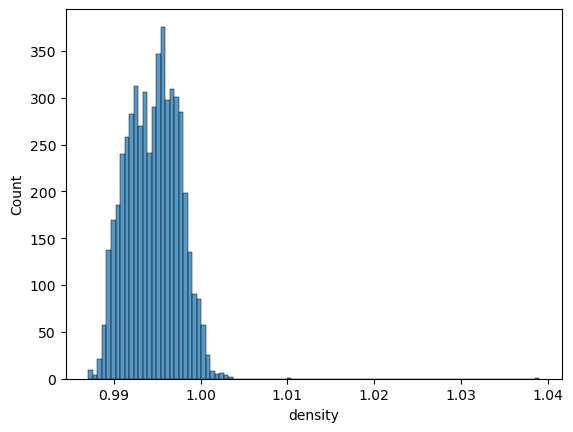

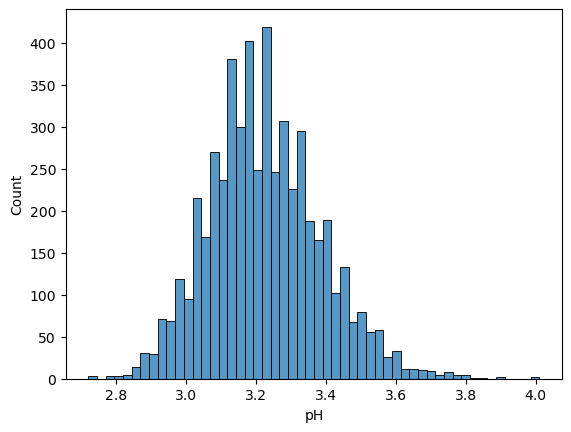

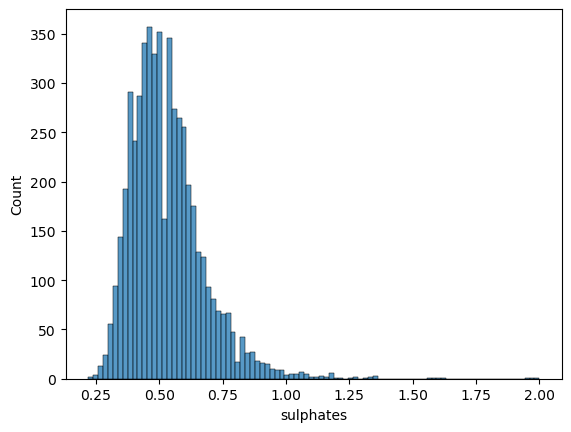

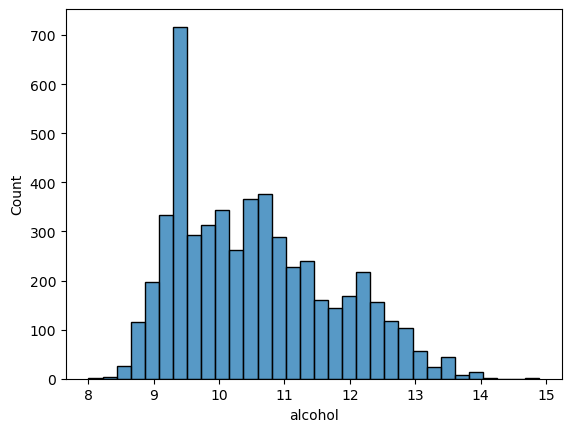

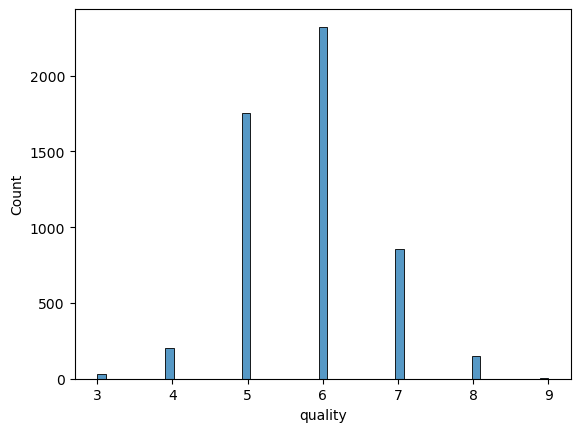

In [14]:
for i in d.columns:
    if d[i].dtypes!='object':
        sns.histplot(x=d[i])
        plt.show()
    

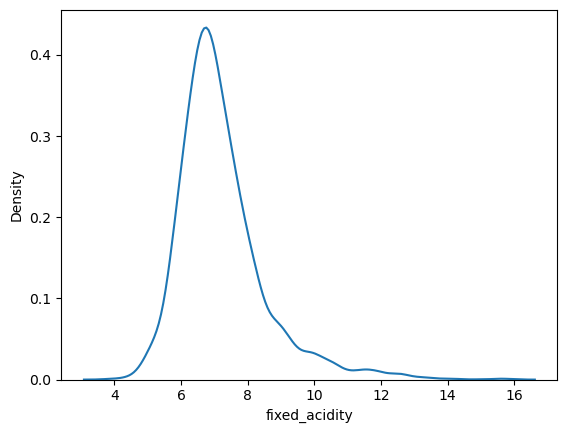

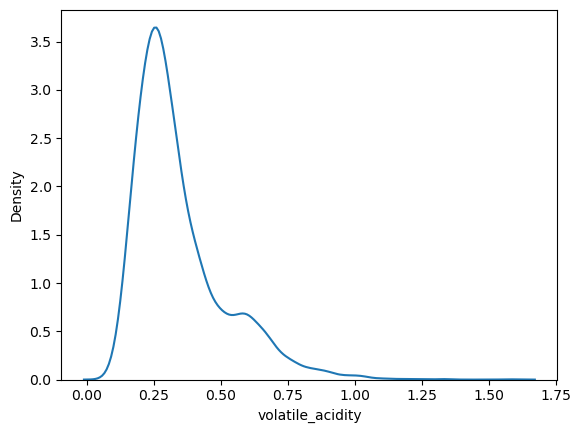

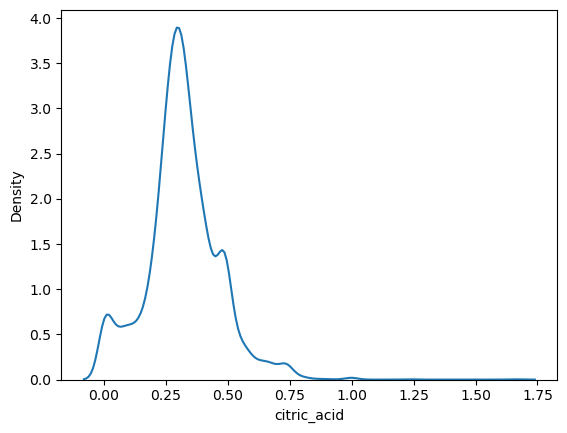

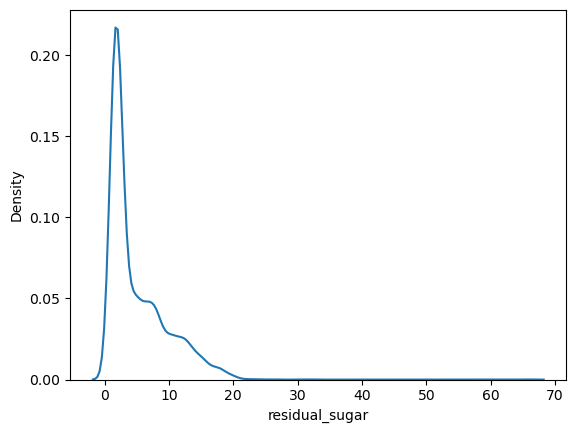

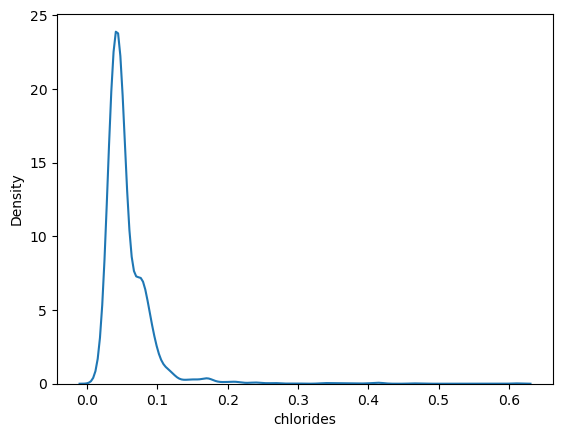

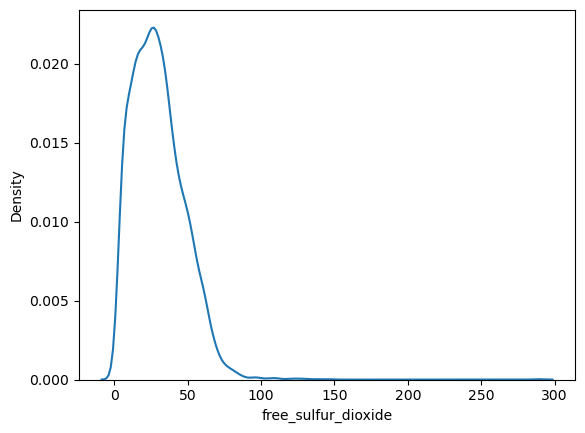

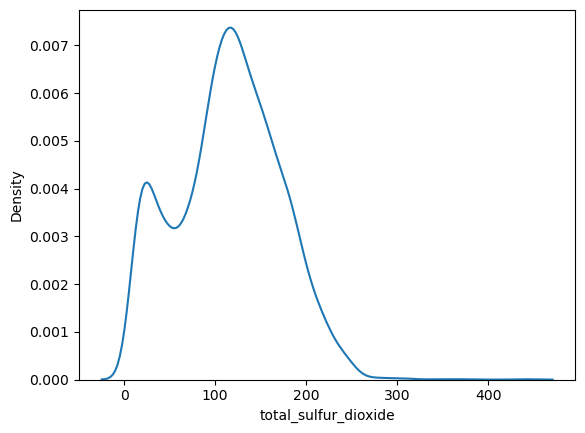

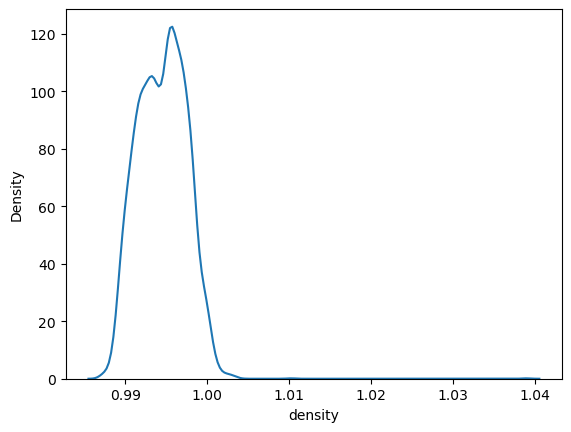

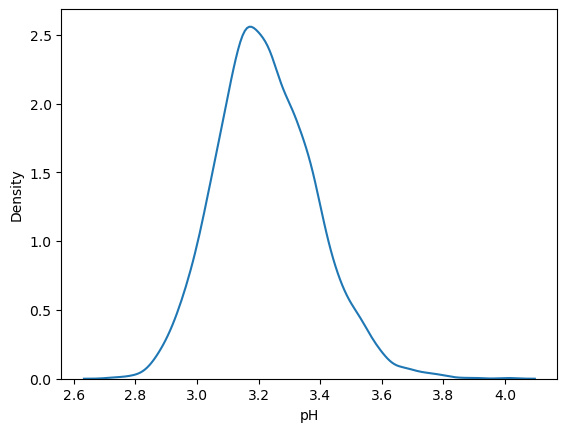

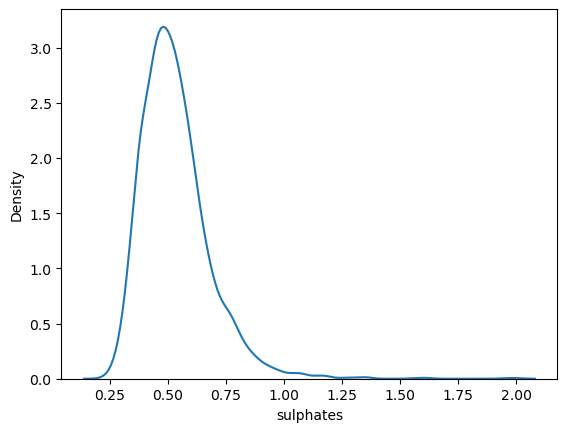

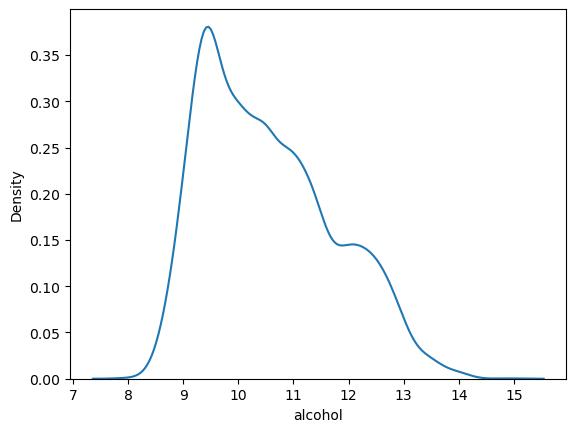

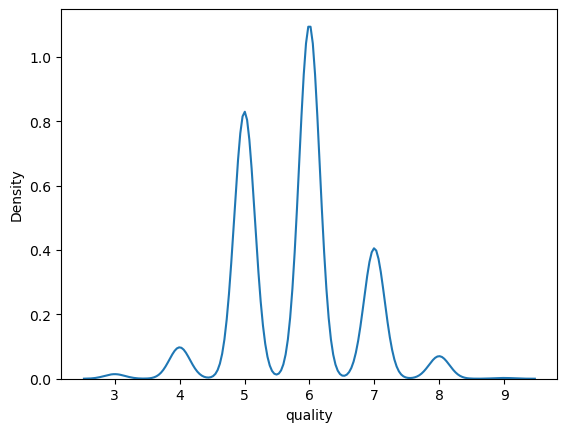

In [15]:
for i in d.columns:
    if d[i].dtypes!='object':
        sns.kdeplot(x=d[i])
        plt.show()

In [16]:
d

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


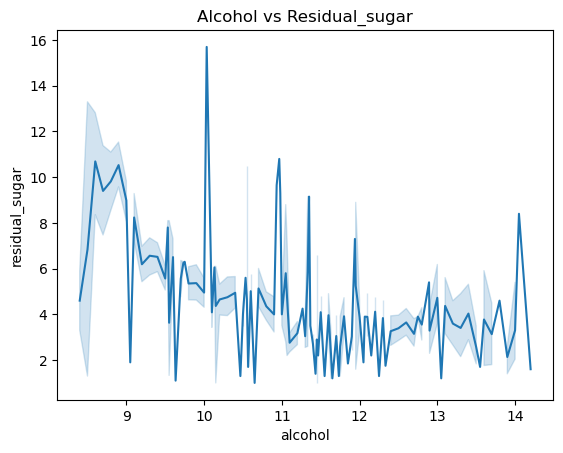

In [37]:
sns.lineplot("alcohol","residual_sugar",data=d)
plt.title("Alcohol vs Residual_sugar")
plt.show()

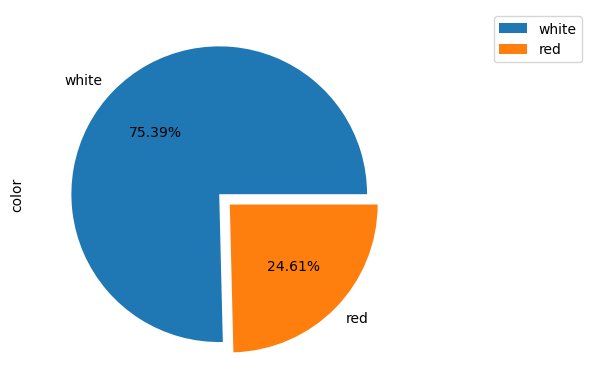

In [3]:
myexplode=[0,0.1]
x=d.color.value_counts().plot.pie(autopct="%1.2f%%",explode=myexplode);
plt.legend(bbox_to_anchor=(1.5,1))
plt.show();


## Treating outliers

In [17]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [18]:
for column in d.columns:
    if d[column].dtype !='object':
        UL,LL=outlier_limit(d[column])
        d[column]=np.where((d[column]>UL)|(d[column]<LL),np.nan,d[column])
       

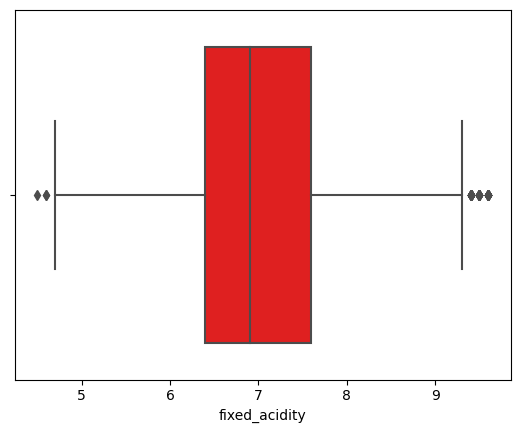

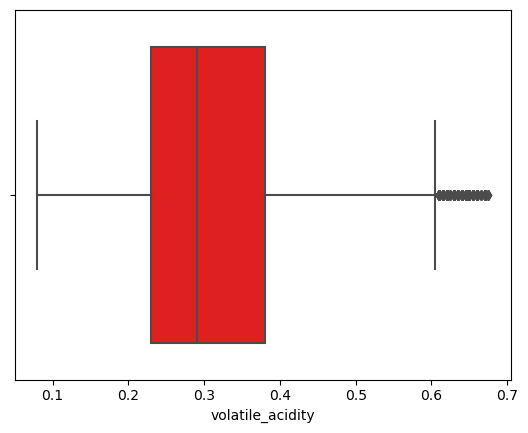

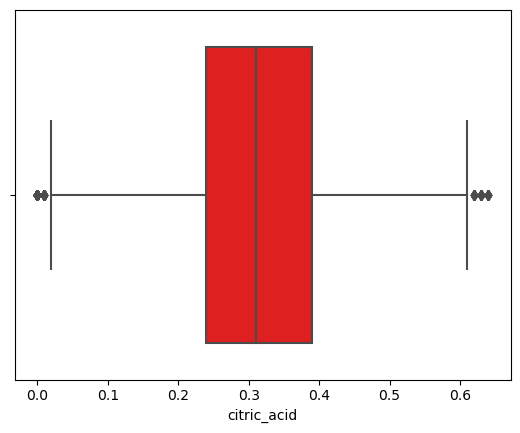

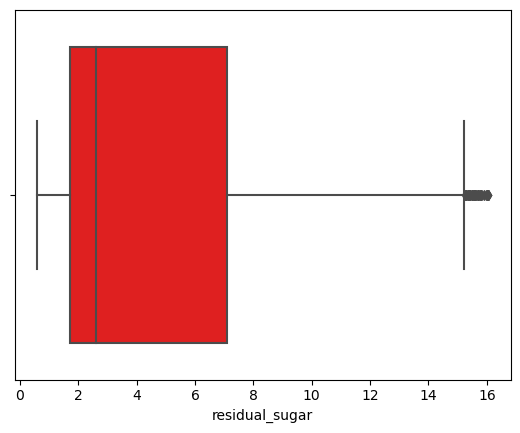

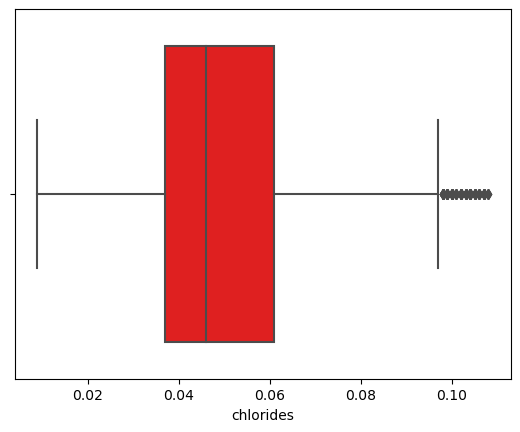

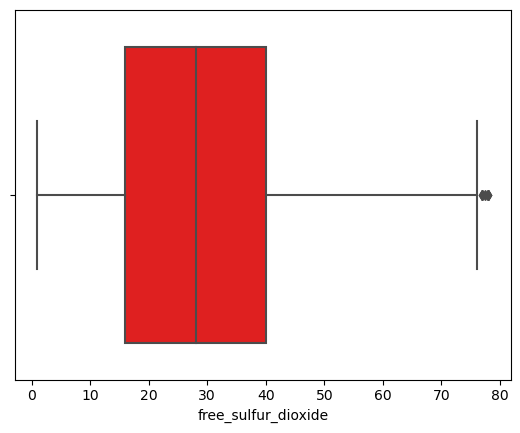

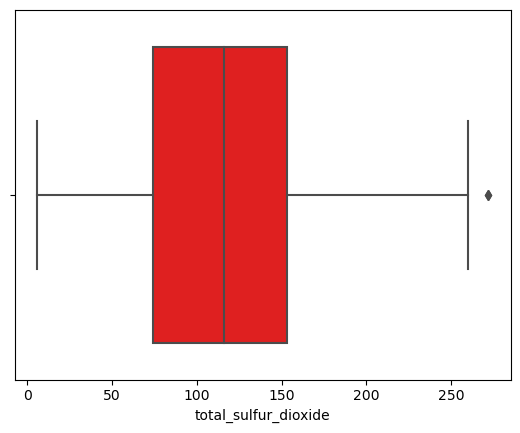

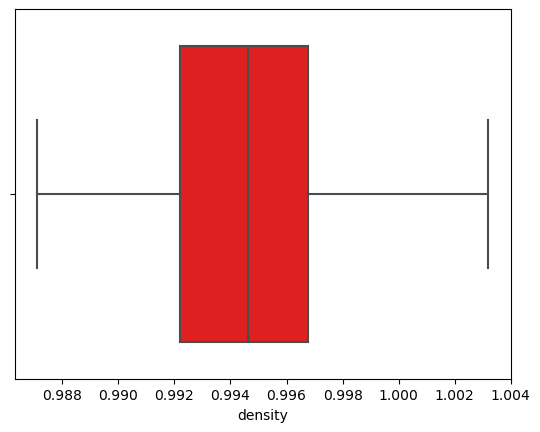

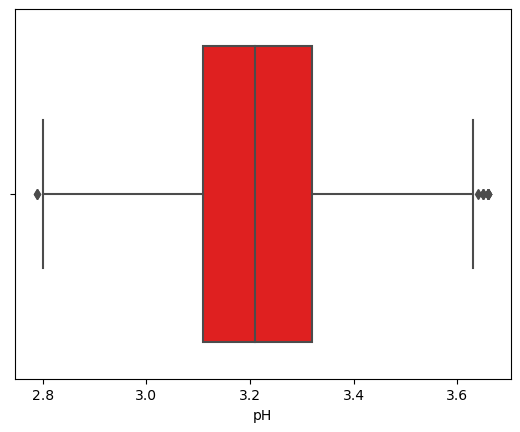

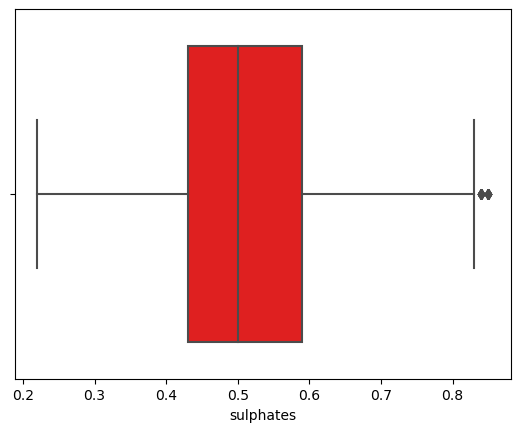

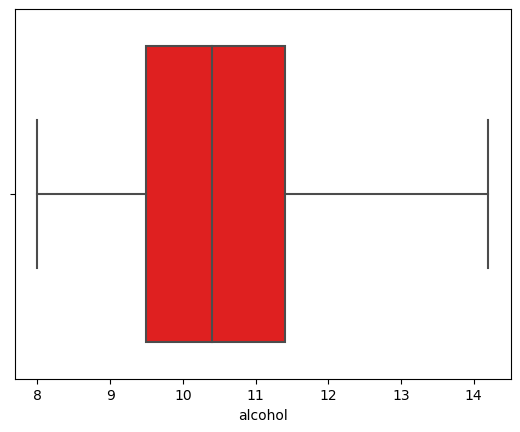

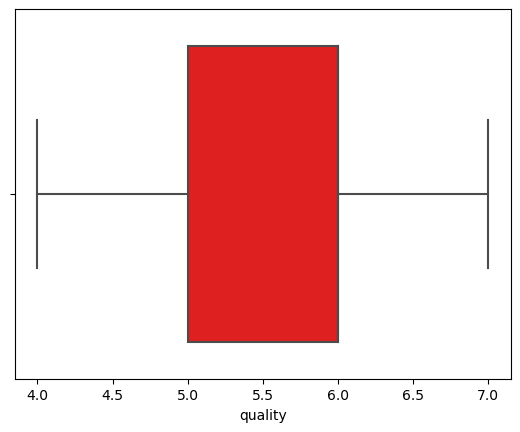

In [19]:
for i in d.columns:
    if d[i].dtypes!='object':
        sns.boxplot(x=d[i],color="red")
        plt.show()

In [20]:
d.dropna(inplace=True)

## Label encoding the categorical columns

In [21]:
le=LabelEncoder()
d['color']=le.fit_transform(d['color'])
d.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5.0,0


In [22]:
sc=StandardScaler()

In [23]:
x_total=d[['fixed_acidity']].values
x_total_transformed=sc.fit_transform(x_total)
x_total_transformed

array([[ 0.48742235],
       [ 1.04349151],
       [ 0.37620852],
       ...,
       [-0.51350214],
       [-1.62564046],
       [-1.0695713 ]])

## Checking the correlation with the target 'Alcohol'

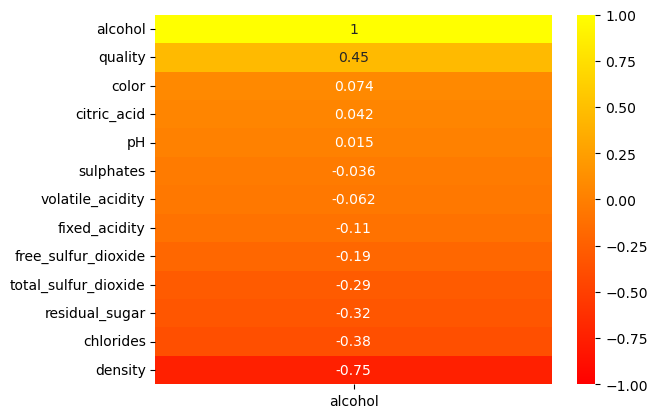

In [24]:
sns.heatmap(d.corr()[['alcohol']].sort_values(by='alcohol', ascending=False),vmin=-1, vmax=1, annot=True,cmap="autumn");

### Lets take only the columns with good correlation with the target

In [25]:
x= d[['pH','sulphates','citric_acid','quality','volatile_acidity']].values

In [26]:
y = d[['alcohol']].values

## Feature Scaling

In [27]:
x = sc.fit_transform(x)

## model buliding

In [28]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DescionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [29]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  1.0556152157649465
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  1.0556093664983885
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  1.0661819237723962
****************************************************************************************************
cross validation model : DescionTreeRegressor
AVERAGE RMSE:  1.3761283741062895
****************************************************************************************************
cross validation model : GradientBoostRegressor
AVERAGE RMSE:  0.9961071118744897
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1.0367009338313937
**********************************************

## Selecting random forest regressor as it is having best metrics

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [31]:
model=RandomForestRegressor()

In [32]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
y_pred=model.predict(x)

In [34]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=('ACTUAL','PREDICTION'),dtype=float)

In [35]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,9.4,9.632000
1,9.4,9.615667
2,10.0,10.538000
3,9.5,10.039500
4,10.5,10.324000


##  Scatter plot

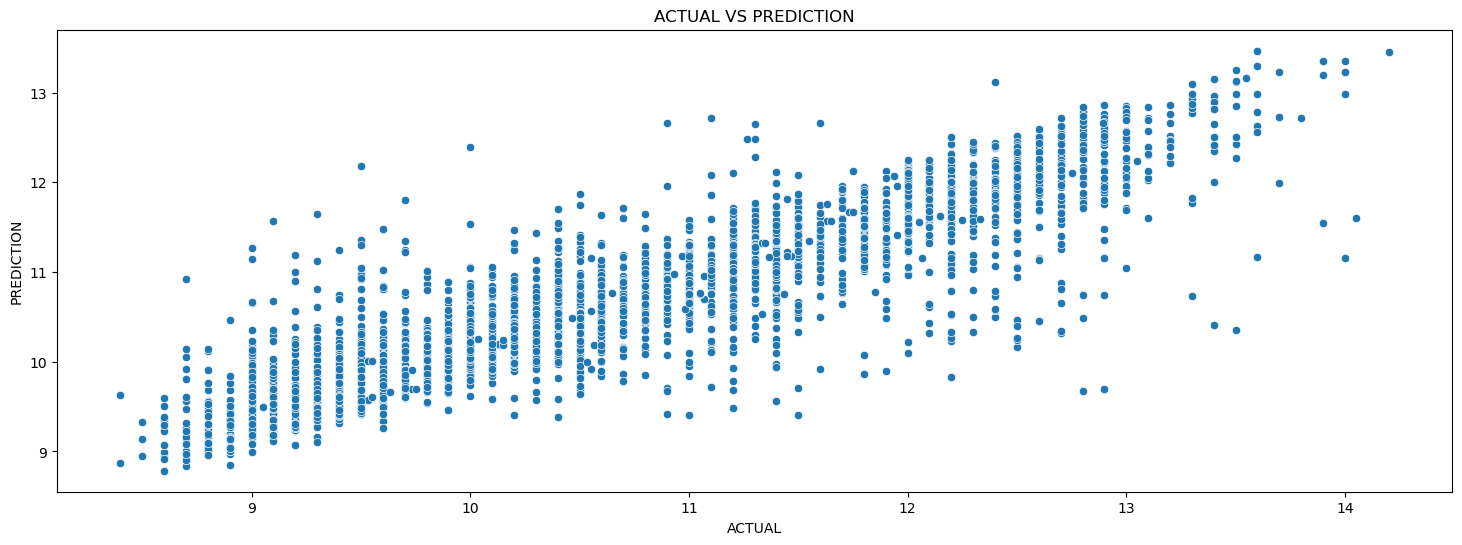

In [36]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");

In [39]:
model.score(x,y)

0.7940182636541031